In [2]:
!pip install spatial_autocorrelation

  Created wheel for spatial-autocorrelation: filename=spatial_autocorrelation-0.0.1a0-py3-none-any.whl size=5683 sha256=2f921195ff2a0012cb92b20a68bcc90f85ec036da4422d89329743db8730812b
  Stored in directory: c:\users\jasper\appdata\local\pip\cache\wheels\37\ea\14\bc2bb8dd8c381c869961a54976ba75955ed3a848b786128db2
Successfully built spatial-autocorrelation


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Global Spatial Autocorrelation
from spatial_autocorrelation import get_moransI, moransI_scatterplot, hypothesis_testing
# Local Spatial Autocorrelation
from spatial_autocorrelation import get_localMoransI, LISA_scatterplot

# Global Spatial Autocorrelation
### Demo: Perfectly Clustered (Moran's I = 1)
- Each tile represents a location
- Black = 0 and White = 1
- Only considering the tiles are topologically related when they are above, below, on the left or right hand side of the tile

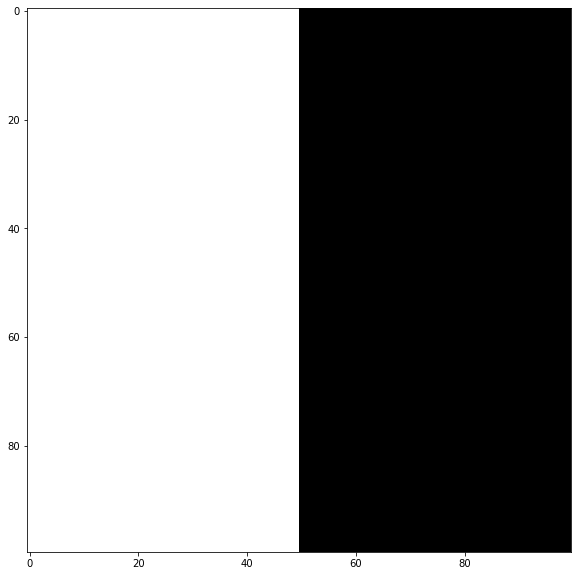

In [139]:
# clustered 
n = 100

y = np.zeros((n,n))
y[:,n//2:] = 1
y = y.reshape(-1)

plt.figure(figsize=(10,10))
plt.imshow(y.reshape(n,n), cmap='Greys',  interpolation='nearest')

### Define a spatial weighted matrix

In [140]:
# each inner array represents the topogical relationship of a tile to the neighbouring tiles
# Only considering the tiles are topologically related 
# when they are above, below, on the left or right hand side of the tile

W = []

for i in range(n):
    for j in range(n):
        
        tmp_W = np.zeros((n,n))

        if (j >= 1): tmp_W[i][j-1] = 1
        if (j < n-1): tmp_W[i][j+1] = 2
        if (i >= 1): tmp_W[i-1][j] = 3
        if (i < n-1): tmp_W[i+1][j] = 4
        
        W.append(tmp_W.reshape(-1))

W = np.array(W)

The expected value of Moran's I: -0.00010001000100010001
The variance of Moran's I: 5.857745665151386e-05
Z score of Moran's I: 129.8788225873467


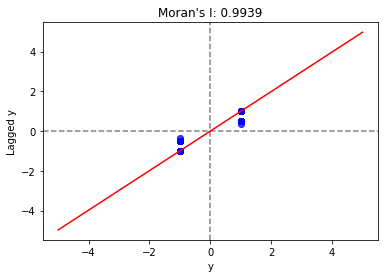

In [142]:
moransI = get_moransI(W,y)
hypothesis_testing(moransI, W, y)
moransI_scatterplot(moransI, W, y)

### Demo: Random (Moran's I = 0)

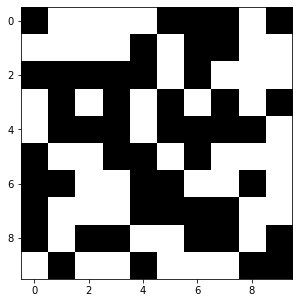

In [6]:
n = 10
y = np.random.randint(0,2,n*n)

plt.figure(figsize=(5,5))
plt.imshow(y.reshape(n,n), cmap='Greys',  interpolation='nearest')

In [7]:
# each inner array represents the topogical relationship of a tile to the neighbouring tiles
# Only considering the tiles are topologically related 
# when they are above, below, on the left or right hand side of the tile

W = []

for i in range(n):
    for j in range(n):
        
        tmp_W = np.zeros((n,n))

        if (j >= 1): tmp_W[i][j-1] = 1
        if (j < n-1): tmp_W[i][j+1] = 2
        if (i >= 1): tmp_W[i-1][j] = 3
        if (i < n-1): tmp_W[i+1][j] = 4
        
        W.append(tmp_W.reshape(-1))

W = np.array(W)

The expected value of Moran's I: -0.010101010101010102
The variance of Moran's I: 0.006358553543113923
Z score of Moran's I: -0.9044484888020863


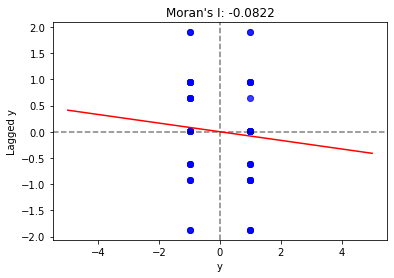

In [8]:
moransI = get_moransI(W,y)
hypothesis_testing(moransI, W, y)
moransI_scatterplot(moransI, W, y)

### Demo: Perfectly Dispersed (Moran's I = -1)

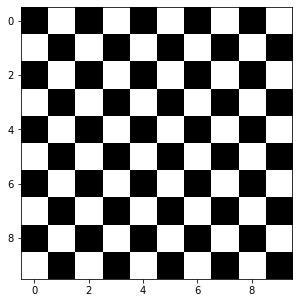

In [9]:
n = 10

y = np.zeros((n,n))
for i in range(n):
    if i%2 == 0:
        y[i,range(0,n,2)] = 1
    else:
        y[i,range(1,n+1,2)] = 1
        
y = y.reshape(-1)

plt.figure(figsize=(5,5))
plt.imshow(y.reshape(n,n), cmap='Greys',  interpolation='nearest')

In [10]:
# each inner array represents the topogical relationship of a tile to the neighbouring tiles
# Only considering the tiles are topologically related 
# when they are above, below, on the left or right hand side of the tile

W = []

for i in range(n):
    for j in range(n):
        
        tmp_W = np.zeros((n,n))

        if (j >= 1): tmp_W[i][j-1] = 1
        if (j < n-1): tmp_W[i][j+1] = 2
        if (i >= 1): tmp_W[i-1][j] = 3
        if (i < n-1): tmp_W[i+1][j] = 4
        
        W.append(tmp_W.reshape(-1))

W = np.array(W)

The expected value of Moran's I: -0.010101010101010102
The variance of Moran's I: 0.006358553543113923
Z score of Moran's I: -12.413999248415166


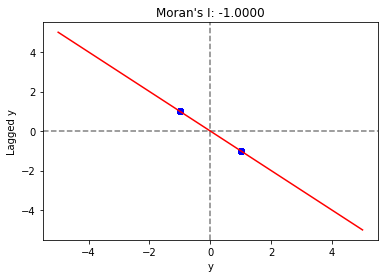

In [11]:
moransI = get_moransI(W,y)
hypothesis_testing(moransI, W, y)
moransI_scatterplot(moransI, W, y)

# Local Clustering

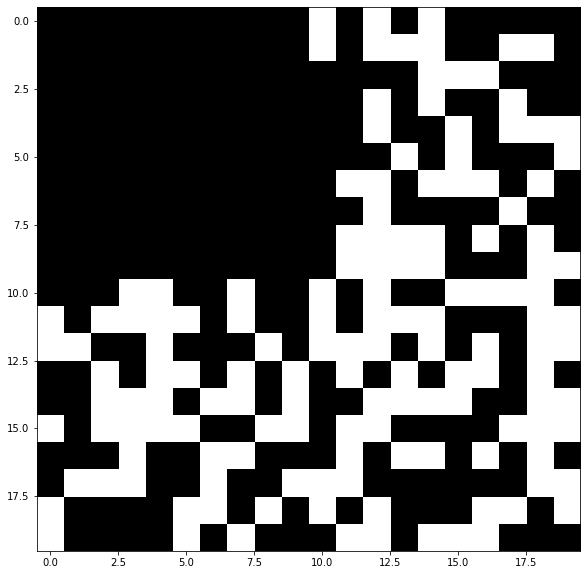

In [12]:
# clustered 
n = 20

y = np.random.randint(0,2,n*n).reshape(n,n)
y[:10,:10] = 1

y = y.reshape(-1)

plt.figure(figsize=(10,10))
plt.imshow(y.reshape(n,n), cmap='Greys',  interpolation='nearest')

In [13]:
# each inner array represents the topogical relationship of a tile to the neighbouring tiles
# Only considering the tiles are topologically related 
# when they are above, below, on the left or right hand side of the tile

W = []

for i in range(n):
    for j in range(n):
        
        tmp_W = np.zeros((n,n))

        if (j >= 1): tmp_W[i][j-1] = 1
        if (j < n-1): tmp_W[i][j+1] = 2
        if (i >= 1): tmp_W[i-1][j] = 3
        if (i < n-1): tmp_W[i+1][j] = 4
        
        W.append(tmp_W.reshape(-1))

W = np.array(W)

The expected value of Moran's I: -0.002506265664160401
The variance of Moran's I: 0.0015196813699377605
Z score of Moran's I: 3.9071408258665183


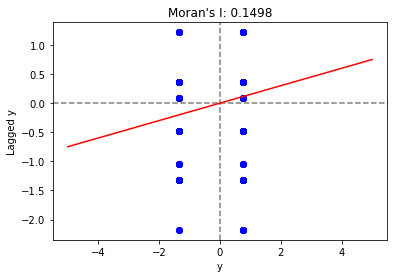

In [14]:
moransI = get_moransI(W,y)
hypothesis_testing(moransI, W, y)
moransI_scatterplot(moransI, W, y)

In [15]:
Y = pd.DataFrame({'y':y})
Y['loc'] = [str((i,j)) for i in range(20) for j in range(20)]
Y.head(20)

,y,loc
0,1,"(0, 0)"
1,1,"(0, 1)"
2,1,"(0, 2)"
3,1,"(0, 3)"
4,1,"(0, 4)"
5,1,"(0, 5)"
6,1,"(0, 6)"
7,1,"(0, 7)"
8,1,"(0, 8)"
9,1,"(0, 9)"


In [16]:
localMoransI = get_localMoransI(W, Y['y'], Y['loc'])
localMoransI

,Name,LISA,E(Ii),VAR(Ii),Z Score
0,"(0, 0)",3.338521,-0.015038,1.048960,3.274360
1,"(0, 1)",3.894942,-0.017544,1.051381,3.815687
2,"(0, 2)",3.894942,-0.017544,1.051381,3.815687
3,"(0, 3)",3.894942,-0.017544,1.051381,3.815687
4,"(0, 4)",3.894942,-0.017544,1.051381,3.815687
...,...,...,...,...,...
395,"(19, 15)",2.391608,-0.015038,1.033798,2.366979
396,"(19, 16)",5.188811,-0.015038,1.033798,5.118078
397,"(19, 17)",-2.887160,-0.015038,1.033948,-2.824577
398,"(19, 18)",3.338521,-0.015038,1.033948,3.298045


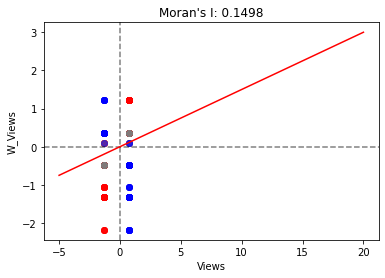

In [17]:
LISA_scatterplot(moransI, W, y ,localMoransI)